<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Diploma_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [4]:
data = pd.read_csv('HR.csv')
data = data.reset_index()
data.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.columns=['id_emp', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 
                     'promotion_last_5years', 'sales', 'salary']
data.head()

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


**2 - Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,cред.отклонение)**





Для начала переведём значение столбца salary в числа (1 - low, 2 - medium, 3 - high)


In [6]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
level_map = {'high':3 , 'medium':2 , 'low':1 }
data['salary'] = data['salary'].map(level_map)
data.head()

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,1
1,1,0.80,0.86,5,262,6,0,1,0,sales,2
2,2,0.11,0.88,7,272,4,0,1,0,sales,2
3,3,0.72,0.87,5,223,5,0,1,0,sales,1
4,4,0.37,0.52,2,159,3,0,1,0,sales,1


In [8]:
# В среднем люди работают 3,5 года, максимальное количество отработанных лет - 10. 
data.describe()

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


Мода

In [0]:
number_list = {}

for i in data['satisfaction_level']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [10]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max )

Moda:  0.1 Count:  358


In [11]:
len(data)

14999

In [0]:
number_list = {}

for i in data['last_evaluation']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [13]:
max = 0
number = None

for k, v in number_list.items():
  # print(k,v)
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  0.55 Count:  358


In [0]:
number_list = {}

for i in data['number_project']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [15]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  4 Count:  4365


In [0]:
number_list = {}

for i in data['average_montly_hours']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [17]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  135 Count:  153


In [0]:
number_list = {}

for i in data['time_spend_company']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [19]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  3 Count:  6443


In [0]:
number_list = {}

for i in data['Work_accident']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [21]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  0 Count:  12830


In [0]:
number_list = {}

for i in data['left']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [23]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  0 Count:  11428


In [0]:
number_list = {}

for i in data['promotion_last_5years']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [25]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  0 Count:  14680


Судя по всему много не удовлетворённых сотрудников, так как значение моды satisfaction_level и last_evaluation по 0.1 и всречаемость самая частая, а также низкий уровень зарплаты так же самый низкий



In [0]:
number_list = {}

for i in data['salary']:
  if i not in number_list:
    number_list[i] = 1
  else:
    number_list[i] += 1

In [27]:
max = 0
number = None

for k, v in number_list.items():
    if max < v:
      max = v
      number = k
print('Moda: ', number, 'Count: ', max)

Moda:  1 Count:  7316


Давайте сделаем группировку по отделам и проанализируем различные метрики. Мы видим, что самый не удовлетворённый отдел accounting, а самый удовлетворённый management. Самая высокая зарплата у management, самая низкая у support. больше всего людей ушло из отдела sales


In [28]:
gb_sales = data.groupby(data['sales']).agg({'id_emp': ['mean'], 'satisfaction_level': ['mean'],	'last_evaluation': ['mean'], 'number_project': ['mean'], 
  'average_montly_hours': ['mean'], 'time_spend_company': ['mean'],'Work_accident': ['mean'], 'promotion_last_5years': ['mean'], 'salary': ['mean'], 'left': 'sum'})
gb_sales

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
,mean,mean,mean,mean,mean,mean,mean,mean,mean,sum
sales,,,,,,,,,,
IT,7655.845966,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.002445,1.571312,273
RandD,6777.346887,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307,1.602287,121
accounting,7255.035202,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253,1.629726,204
hr,7035.889039,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298,1.607578,215
management,9438.363492,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524,2.071429,91
marketing,7750.684149,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117,1.624709,203
product_mng,8095.417960,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000,1.575388,198
sales,7675.873430,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155,1.557971,1014


In [29]:
data.head()

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,1
1,1,0.80,0.86,5,262,6,0,1,0,sales,2
2,2,0.11,0.88,7,272,4,0,1,0,sales,2
3,3,0.72,0.87,5,223,5,0,1,0,sales,1
4,4,0.37,0.52,2,159,3,0,1,0,sales,1


**3 - Рассчитать и визуализировать корреляционную матрицу для переменных.**

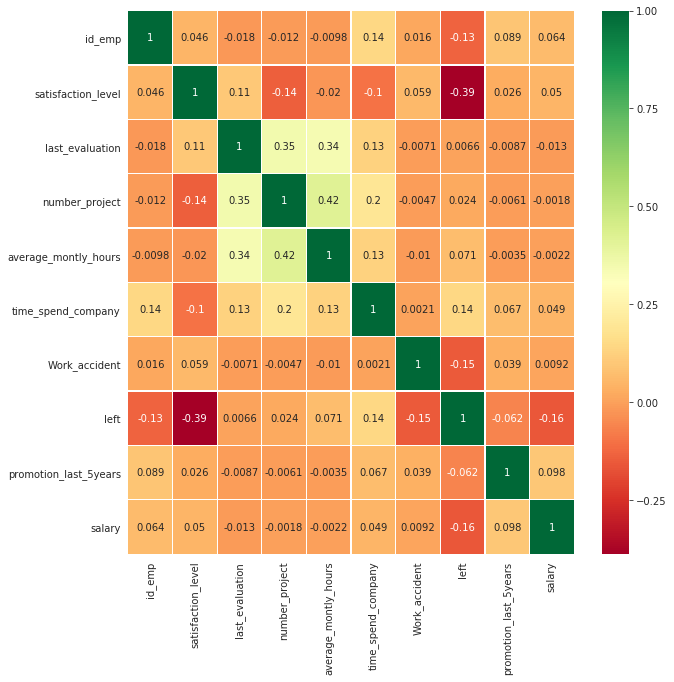

In [30]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

** **4 - Визуализировать несколько взаимосвязей между переменными**.
**

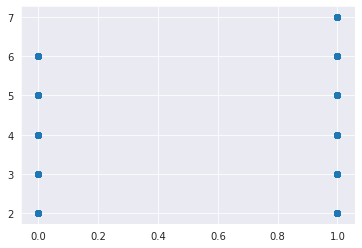

In [31]:
# Одной из задач является понять, почему люди покидают компанию, на этом графике видно, что у уволившихся сотрудников могло быть до 7 дополнительных проектов, в том время, как
# у оставшихся максимум 6
plt.scatter(data['left'], data['number_project'])

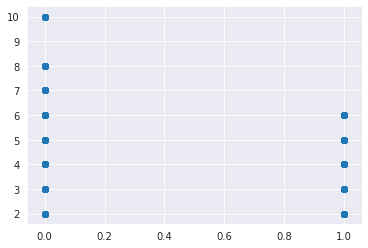

In [32]:
# Тут мы видим, что уволившиеся сотрудники максимум работали до 6-ти лет
plt.scatter(data['left'], data['time_spend_company'])

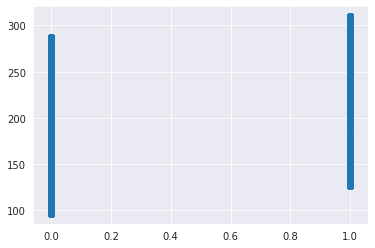

In [33]:
# При этом видно, что уволившиеся сотрудники работали дольше за месяц, в том чиле более 300 часов, у не уволившихся до 300 часов.
plt.scatter(data['left'], data['average_montly_hours'])

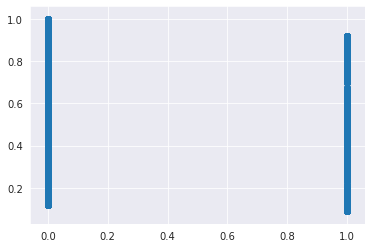

In [34]:
# У уволившихся сотрудников уровень удовлетворения ниже чем у остальных
plt.scatter(data['left'], data['satisfaction_level'])

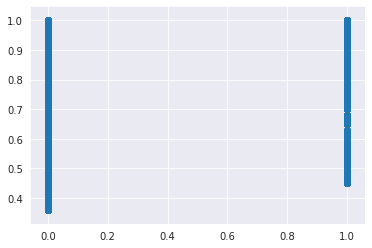

In [35]:
# У уволившихся сотрудников уровень удовлетворения ниже чем у остальных
plt.scatter(data['left'], data['last_evaluation'])

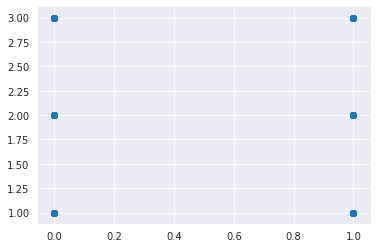

In [36]:
plt.scatter(data['left'], data['salary'])

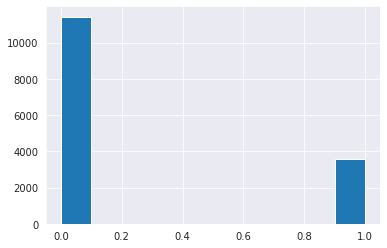

In [37]:
data['left'].hist()

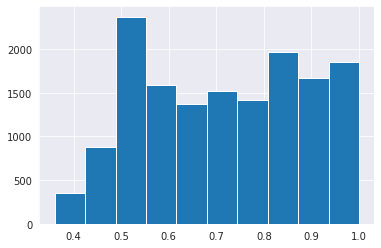

In [38]:
plt.hist(data['last_evaluation'], 10)
plt.show()

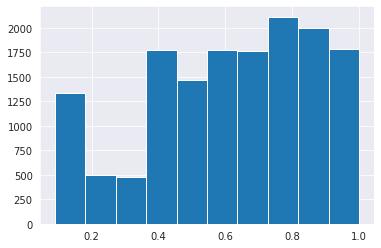

In [39]:
plt.hist(data['satisfaction_level'], 10)
plt.show()

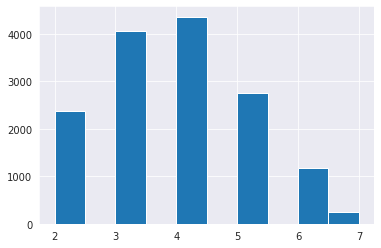

In [40]:
plt.hist(data['number_project'], 10)
plt.show()

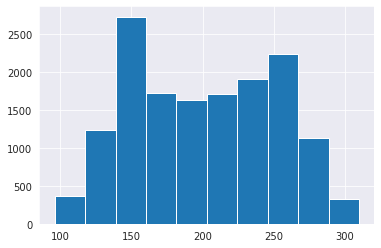

In [41]:
plt.hist(data['average_montly_hours'], 10)
plt.show()

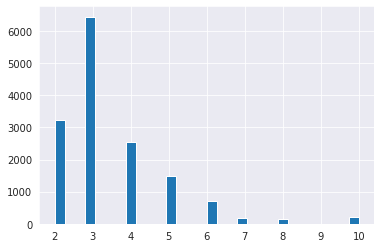

In [42]:
plt.hist(data['time_spend_company'], 30)
plt.show()

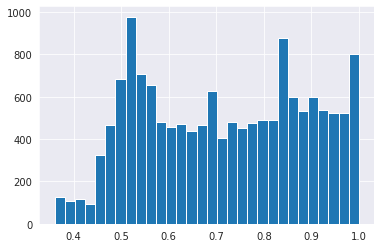

In [43]:
plt.hist(data['last_evaluation'], 30)
plt.show()

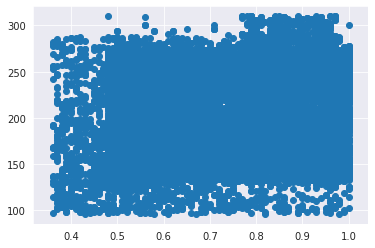

In [44]:
plt.scatter(data['last_evaluation'], data['average_montly_hours'])

**5 - С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [45]:
# Сравним покинувших людей удовлетворенных и не удовлетворенных
left_non_sat = data[data['satisfaction_level'] < 0.64]['left']
left_sat = data[data['satisfaction_level'] >= 0.64]['left']
stats.ttest_ind(left_non_sat, left_sat)
# В данном случае p_value низкое е-251, а также высокое t значение, что говорит о том, что выборки отличаются сильно друг от друга.

Ttest_indResult(statistic=34.49933528721708, pvalue=4.722826429453508e-251)

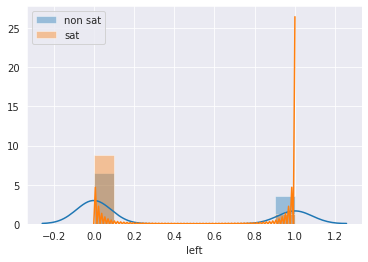

In [46]:
sns.distplot(left_non_sat, 10)
sns.distplot(left_sat, 10)
plt.legend(['non sat', 'sat'])
plt.show()

In [47]:
time_non_sat = data[data['satisfaction_level'] < 0.64]['time_spend_company']
time_sat = data[data['satisfaction_level'] >= 0.64]['time_spend_company']
stats.ttest_ind(time_non_sat, time_sat)
# В данном случае p_value низкое 0.02, а также высокое t значение, что говорит о том, что выборки отличаются сильно друг от друга.

Ttest_indResult(statistic=2.23721195906475, pvalue=0.02528712170095005)

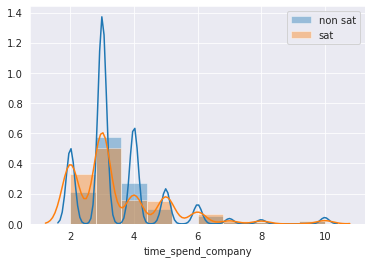

In [48]:
sns.distplot(time_non_sat, 10)
sns.distplot(time_sat, 10)
plt.legend(['non sat', 'sat'])
plt.show()

**6 - Рассчитать сколько работников работает в каждом департаменте.**

In [49]:
emp_count = data.groupby(data['sales']).count()
emp_count.filter(items=['id_emp']).sort_values('id_emp', ascending=False)

,id_emp
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


**7 - Показать распределение сотрудников по зарплатам.**

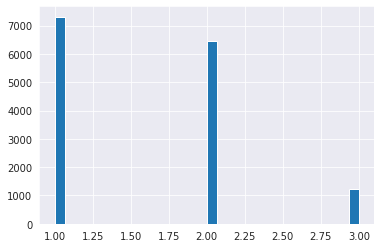

In [50]:
plt.hist(data['salary'], 30)
plt.show()

In [51]:
print('emp count with salary 1 -', len(data[data['salary']==1]), 'this is {:.2f}%'.format(len(data[data['salary']==1])/len(data)*100))
print('emp count with salary 2 -',len(data[data['salary']==2]), 'this is {:.2f}%'.format(len(data[data['salary']==2])/len(data)*100))
print('emp count with salary 3 -',len(data[data['salary']==3]), 'this is {:.2f}%'.format(len(data[data['salary']==3])/len(data)*100))

emp count with salary 1 - 7316 this is 48.78%
emp count with salary 2 - 6446 this is 42.98%
emp count with salary 3 - 1237 this is 8.25%


**8 - Показать распределение сотрудников по зарплатам совместно с департаментами.**

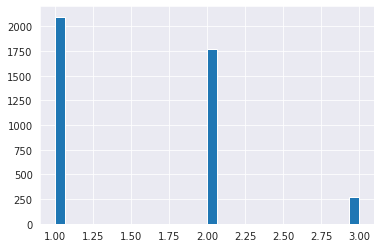

In [52]:
# департамент продаж
dep_sales = data[(data['sales']=='sales')]
plt.hist(dep_sales['salary'], 30)
plt.show()

In [53]:
print('emp count with salary 1 -', len(dep_sales[dep_sales['salary']==1]), 'this is {:.2f}%'.format(len(dep_sales[dep_sales['salary']==1])/len(dep_sales)*100))
print('emp count with salary 2 -',len(dep_sales[dep_sales['salary']==2]), 'this is {:.2f}%'.format(len(dep_sales[dep_sales['salary']==2])/len(dep_sales)*100))
print('emp count with salary 3 -',len(dep_sales[dep_sales['salary']==3]), 'this is {:.2f}%'.format(len(dep_sales[dep_sales['salary']==3])/len(dep_sales)*100))

emp count with salary 1 - 2099 this is 50.70%
emp count with salary 2 - 1772 this is 42.80%
emp count with salary 3 - 269 this is 6.50%


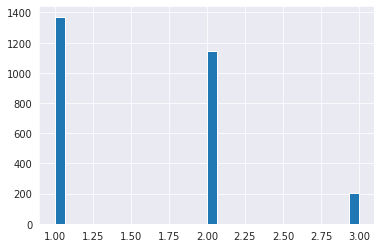

In [54]:
# департамент технический
dep_technical= data[(data['sales']=='technical')]
plt.hist(dep_technical['salary'], 30)
plt.show()

In [55]:
print('emp count with salary 1 -', len(dep_technical[dep_technical['salary']==1]), 'this is {:.2f}%'.format(len(dep_technical[dep_technical['salary']==1])/len(dep_technical)*100))
print('emp count with salary 2 -',len(dep_technical[dep_technical['salary']==2]), 'this is {:.2f}%'.format(len(dep_technical[dep_technical['salary']==2])/len(dep_technical)*100))
print('emp count with salary 3 -',len(dep_technical[dep_technical['salary']==3]), 'this is {:.2f}%'.format(len(dep_technical[dep_technical['salary']==3])/len(dep_technical)*100))

emp count with salary 1 - 1372 this is 50.44%
emp count with salary 2 - 1147 this is 42.17%
emp count with salary 3 - 201 this is 7.39%


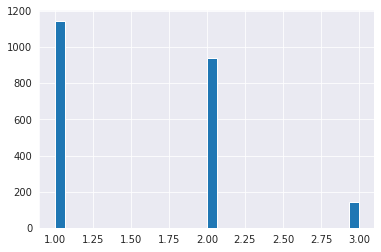

In [56]:
# департамент поддержки
dep_support= data[(data['sales']=='support')]
plt.hist(dep_support['salary'], 30)
plt.show()

In [57]:
print('emp count with salary 1 -', len(dep_support[dep_support['salary']==1]), 'this is {:.2f}%'.format(len(dep_support[dep_support['salary']==1])/len(dep_support)*100))
print('emp count with salary 2 -',len(dep_support[dep_support['salary']==2]), 'this is {:.2f}%'.format(len(dep_support[dep_support['salary']==2])/len(dep_support)*100))
print('emp count with salary 3 -',len(dep_support[dep_support['salary']==3]), 'this is {:.2f}%'.format(len(dep_support[dep_support['salary']==3])/len(dep_support)*100))

emp count with salary 1 - 1146 this is 51.41%
emp count with salary 2 - 942 this is 42.26%
emp count with salary 3 - 141 this is 6.33%


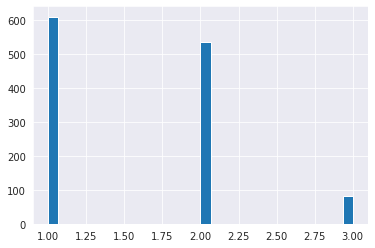

In [58]:
# департамент IT
dep_it= data[(data['sales']=='IT')]
plt.hist(dep_it['salary'], 30)
plt.show()

In [59]:
print('emp count with salary 1 -', len(dep_it[dep_it['salary']==1]), 'this is {:.2f}%'.format(len(dep_it[dep_it['salary']==1])/len(dep_it)*100))
print('emp count with salary 2 -',len(dep_it[dep_it['salary']==2]), 'this is {:.2f}%'.format(len(dep_it[dep_it['salary']==2])/len(dep_it)*100))
print('emp count with salary 3 -',len(dep_it[dep_it['salary']==3]), 'this is {:.2f}%'.format(len(dep_it[dep_it['salary']==3])/len(dep_it)*100))

emp count with salary 1 - 609 this is 49.63%
emp count with salary 2 - 535 this is 43.60%
emp count with salary 3 - 83 this is 6.76%


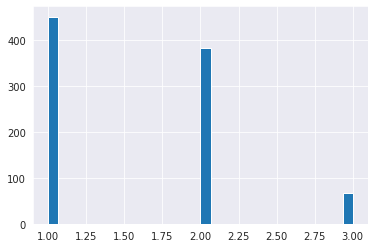

In [60]:
# департамент product mng
dep_product_mng= data[(data['sales']=='product_mng')]
plt.hist(dep_product_mng['salary'], 30)
plt.show()

In [61]:
print('emp count with salary 1 -', len(dep_product_mng[dep_product_mng['salary']==1]), 'this is {:.2f}%'.format(len(dep_product_mng[dep_product_mng['salary']==1])/len(dep_product_mng)*100))
print('emp count with salary 2 -',len(dep_product_mng[dep_product_mng['salary']==2]), 'this is {:.2f}%'.format(len(dep_product_mng[dep_product_mng['salary']==2])/len(dep_product_mng)*100))
print('emp count with salary 3 -',len(dep_product_mng[dep_product_mng['salary']==3]), 'this is {:.2f}%'.format(len(dep_product_mng[dep_product_mng['salary']==3])/len(dep_product_mng)*100))

emp count with salary 1 - 451 this is 50.00%
emp count with salary 2 - 383 this is 42.46%
emp count with salary 3 - 68 this is 7.54%


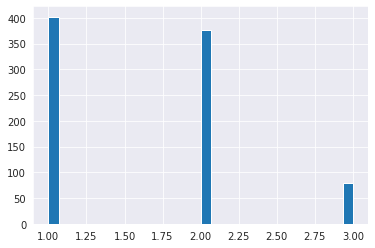

In [62]:
# департамент marketing
dep_marketing= data[(data['sales']=='marketing')]
plt.hist(dep_marketing['salary'], 30)
plt.show()

In [63]:
print('emp count with salary 1 -', len(dep_marketing[dep_marketing['salary']==1]), 'this is {:.2f}%'.format(len(dep_marketing[dep_marketing['salary']==1])/len(dep_marketing)*100))
print('emp count with salary 2 -',len(dep_marketing[dep_marketing['salary']==2]), 'this is {:.2f}%'.format(len(dep_marketing[dep_marketing['salary']==2])/len(dep_marketing)*100))
print('emp count with salary 3 -',len(dep_marketing[dep_marketing['salary']==3]), 'this is {:.2f}%'.format(len(dep_marketing[dep_marketing['salary']==3])/len(dep_marketing)*100))

emp count with salary 1 - 402 this is 46.85%
emp count with salary 2 - 376 this is 43.82%
emp count with salary 3 - 80 this is 9.32%


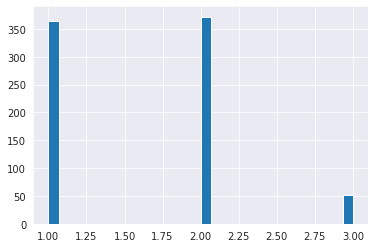

In [64]:
# департамент RandD
dep_randd= data[(data['sales']=='RandD')]
plt.hist(dep_randd['salary'], 30)
plt.show()

In [65]:
print('emp count with salary 1 -', len(dep_randd[dep_randd['salary']==1]), 'this is {:.2f}%'.format(len(dep_randd[dep_randd['salary']==1])/len(dep_randd)*100))
print('emp count with salary 2 -',len(dep_randd[dep_randd['salary']==2]), 'this is {:.2f}%'.format(len(dep_randd[dep_randd['salary']==2])/len(dep_randd)*100))
print('emp count with salary 3 -',len(dep_randd[dep_randd['salary']==3]), 'this is {:.2f}%'.format(len(dep_randd[dep_randd['salary']==3])/len(dep_randd)*100))

emp count with salary 1 - 364 this is 46.25%
emp count with salary 2 - 372 this is 47.27%
emp count with salary 3 - 51 this is 6.48%


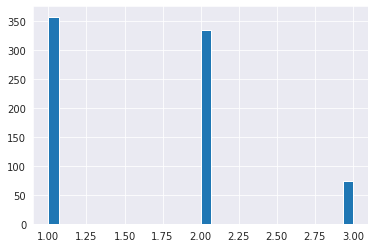

In [66]:
# департамент accounting
dep_acc= data[(data['sales']=='accounting')]
plt.hist(dep_acc['salary'], 30)
plt.show()

In [67]:
print('emp count with salary 1 -', len(dep_acc[dep_acc['salary']==1]), 'this is {:.2f}%'.format(len(dep_acc[dep_acc['salary']==1])/len(dep_acc)*100))
print('emp count with salary 2 -',len(dep_acc[dep_acc['salary']==2]), 'this is {:.2f}%'.format(len(dep_acc[dep_acc['salary']==2])/len(dep_acc)*100))
print('emp count with salary 3 -',len(dep_acc[dep_acc['salary']==3]), 'this is {:.2f}%'.format(len(dep_acc[dep_acc['salary']==3])/len(dep_acc)*100))

emp count with salary 1 - 358 this is 46.68%
emp count with salary 2 - 335 this is 43.68%
emp count with salary 3 - 74 this is 9.65%


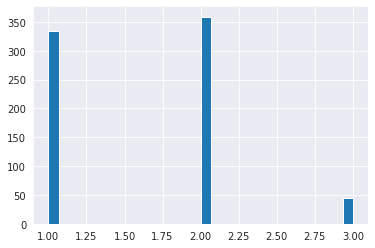

In [68]:
# департамент hr
dep_hr= data[(data['sales']=='hr')]
plt.hist(dep_hr['salary'], 30)
plt.show()

In [69]:
print('emp count with salary 1 -', len(dep_hr[dep_hr['salary']==1]), 'this is {:.2f}%'.format(len(dep_hr[dep_hr['salary']==1])/len(dep_hr)*100))
print('emp count with salary 2 -',len(dep_hr[dep_hr['salary']==2]), 'this is {:.2f}%'.format(len(dep_hr[dep_hr['salary']==2])/len(dep_hr)*100))
print('emp count with salary 3 -',len(dep_hr[dep_hr['salary']==3]), 'this is {:.2f}%'.format(len(dep_hr[dep_hr['salary']==3])/len(dep_hr)*100))

emp count with salary 1 - 335 this is 45.33%
emp count with salary 2 - 359 this is 48.58%
emp count with salary 3 - 45 this is 6.09%


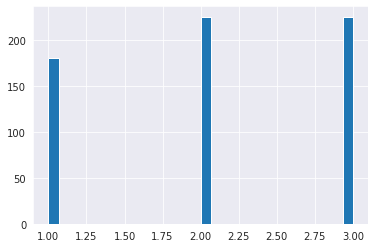

In [70]:
# департамент hr
dep_mng= data[(data['sales']=='management')]
plt.hist(dep_mng['salary'], 30)
plt.show()

In [71]:
print('emp count with salary 1 -', len(dep_mng[dep_mng['salary']==1]), 'this is {:.2f}%'.format(len(dep_mng[dep_mng['salary']==1])/len(dep_mng)*100))
print('emp count with salary 2 -',len(dep_mng[dep_mng['salary']==2]), 'this is {:.2f}%'.format(len(dep_mng[dep_mng['salary']==2])/len(dep_mng)*100))
print('emp count with salary 3 -',len(dep_mng[dep_mng['salary']==3]), 'this is {:.2f}%'.format(len(dep_mng[dep_mng['salary']==3])/len(dep_mng)*100))

emp count with salary 1 - 180 this is 28.57%
emp count with salary 2 - 225 this is 35.71%
emp count with salary 3 - 225 this is 35.71%


Анализируя данные по зарплатам в разрезе департаментов выяснились следующие интересные факты. Вот процентное распределение по уровню зарплат всех сотрудников компании 
emp count with salary 1 - 7316 this is 48.78%
emp count with salary 2 - 6446 this is 42.98%
emp count with salary 3 - 1237 this is 8.25%

Получается, что сотрудников с уровнем зарплаты 3 всего 8%. Наибольшее количество сотрудников почти 49% с уровнем зарплаты 1. Однако в разрезе департаментов эта пропорция не всегда соблюдается, к примеру в дпаратаментах hr и RandD бОльшее количество сотрудников у сровнем зарплаты 2, а в департаменте management и вовсе 
emp count with salary 1 - 180 this is 28.57%
emp count with salary 2 - 225 this is 35.71%
emp count with salary 3 - 225 this is 35.71%

Все эти распределения по зарплатам говорят, о том, что по сути есть департаменты с бОльшей удовлетворённостью и меньшей текучкой и наоборот.


**9 - Сколько сотрудников покинули компанию.**

In [72]:
print('Left company -', len(data[data['left']==1]), 'this is {:.2f}%'.format(len(data[data['left']==1])/len(data)*100))
print('Not left company -', len(data[data['left']==0]), 'this is {:.2f}%'.format(len(data[data['left']==0])/len(data)*100))

Left company - 3571 this is 23.81%
Not left company - 11428 this is 76.19%


In [0]:
# Теперь давайте отранижурем количество уволившихся сотрудников по отделам
left_by_dept = data[data['left']==1]
left_by_dept = data.groupby('sales').sum()

In [74]:
left_by_dept_filtered = left_by_dept.filter(items=['left']).sort_values(by='left', ascending=False)
left_by_dept_filtered

,left
sales,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


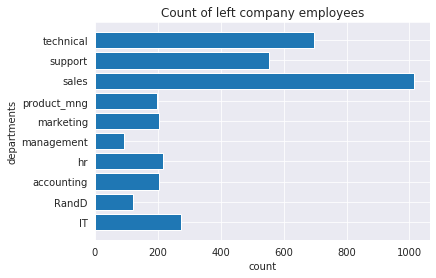

In [75]:
fig = left_by_dept.reset_index()
plt.barh(fig['sales'], fig['left'])
plt.xlabel('count')
plt.ylabel('departments')
plt.title('Count of left company employees')
plt.show()

**10 - Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

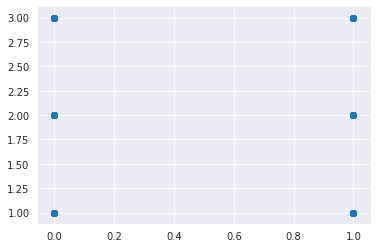

In [76]:
# Гепотеза покидают из-за зарплаты
plt.scatter(data['left'], data['salary'])
plt.show()

In [77]:
# Мы видим, что корреляции нет между уровнем зарплаты и уходом из компании
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['left'], data['salary'])
print(corr)

-0.15789779086764885


In [117]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['left'], data['satisfaction_level'])
print(corr)

-0.38837498342411403


In [106]:
# нет отличия между последними оценками у уволившихся и оставшихся сотрудников
left_eval = data[data['left']==1]['last_evaluation']
stay_eval = data[data['left']==0]['last_evaluation']
stats.ttest_ind(left_eval, stay_eval)

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [115]:
# существенная разница в удовлетворении у уволившихся и оставшихся сотрудников
left_satis = data[data['left']==1]['satisfaction_level']
stay_satis = data[data['left']==0]['satisfaction_level']
stats.ttest_ind(left_satis, stay_satis)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [111]:
# критерий Манна-Уитни говорит о том же, что и предыдущий
u, p_value = stats.mannwhitneyu(data[data['left']==1]['satisfaction_level'], data[data['left']==0]['satisfaction_level'])
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.0


In [112]:
# существенная разница в продвижении у уволившихся и оставшихся сотрудников
left_promo = data[data['left']==1]['promotion_last_5years']
stay_promo = data[data['left']==0]['promotion_last_5years']
stats.ttest_ind(left_promo, stay_promo)

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

In [116]:
# существенная разница в зарплате у уволившихся и оставшихся сотрудников
left_satis = data[data['left']==1]['salary']
stay_satis = data[data['left']==0]['salary']
stats.ttest_ind(left_satis, stay_satis)

Ttest_indResult(statistic=-19.58216626170969, pvalue=2.475238171818194e-84)

Из данных Т-тестов видно, что есть существенные отличия в продвижении и уровне зарплаты у уволившихся сотрудников по сравнению с оставшимеся

In [109]:
data

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,1,1
1,1,0.80,0.86,5,262,6,0,1,0,1,2
2,2,0.11,0.88,7,272,4,0,1,0,1,2
3,3,0.72,0.87,5,223,5,0,1,0,1,1
4,4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,3,1
14995,14995,0.37,0.48,2,160,3,0,1,0,3,1
14996,14996,0.37,0.53,2,143,3,0,1,0,3,1
14997,14997,0.11,0.96,6,280,4,0,1,0,3,1


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


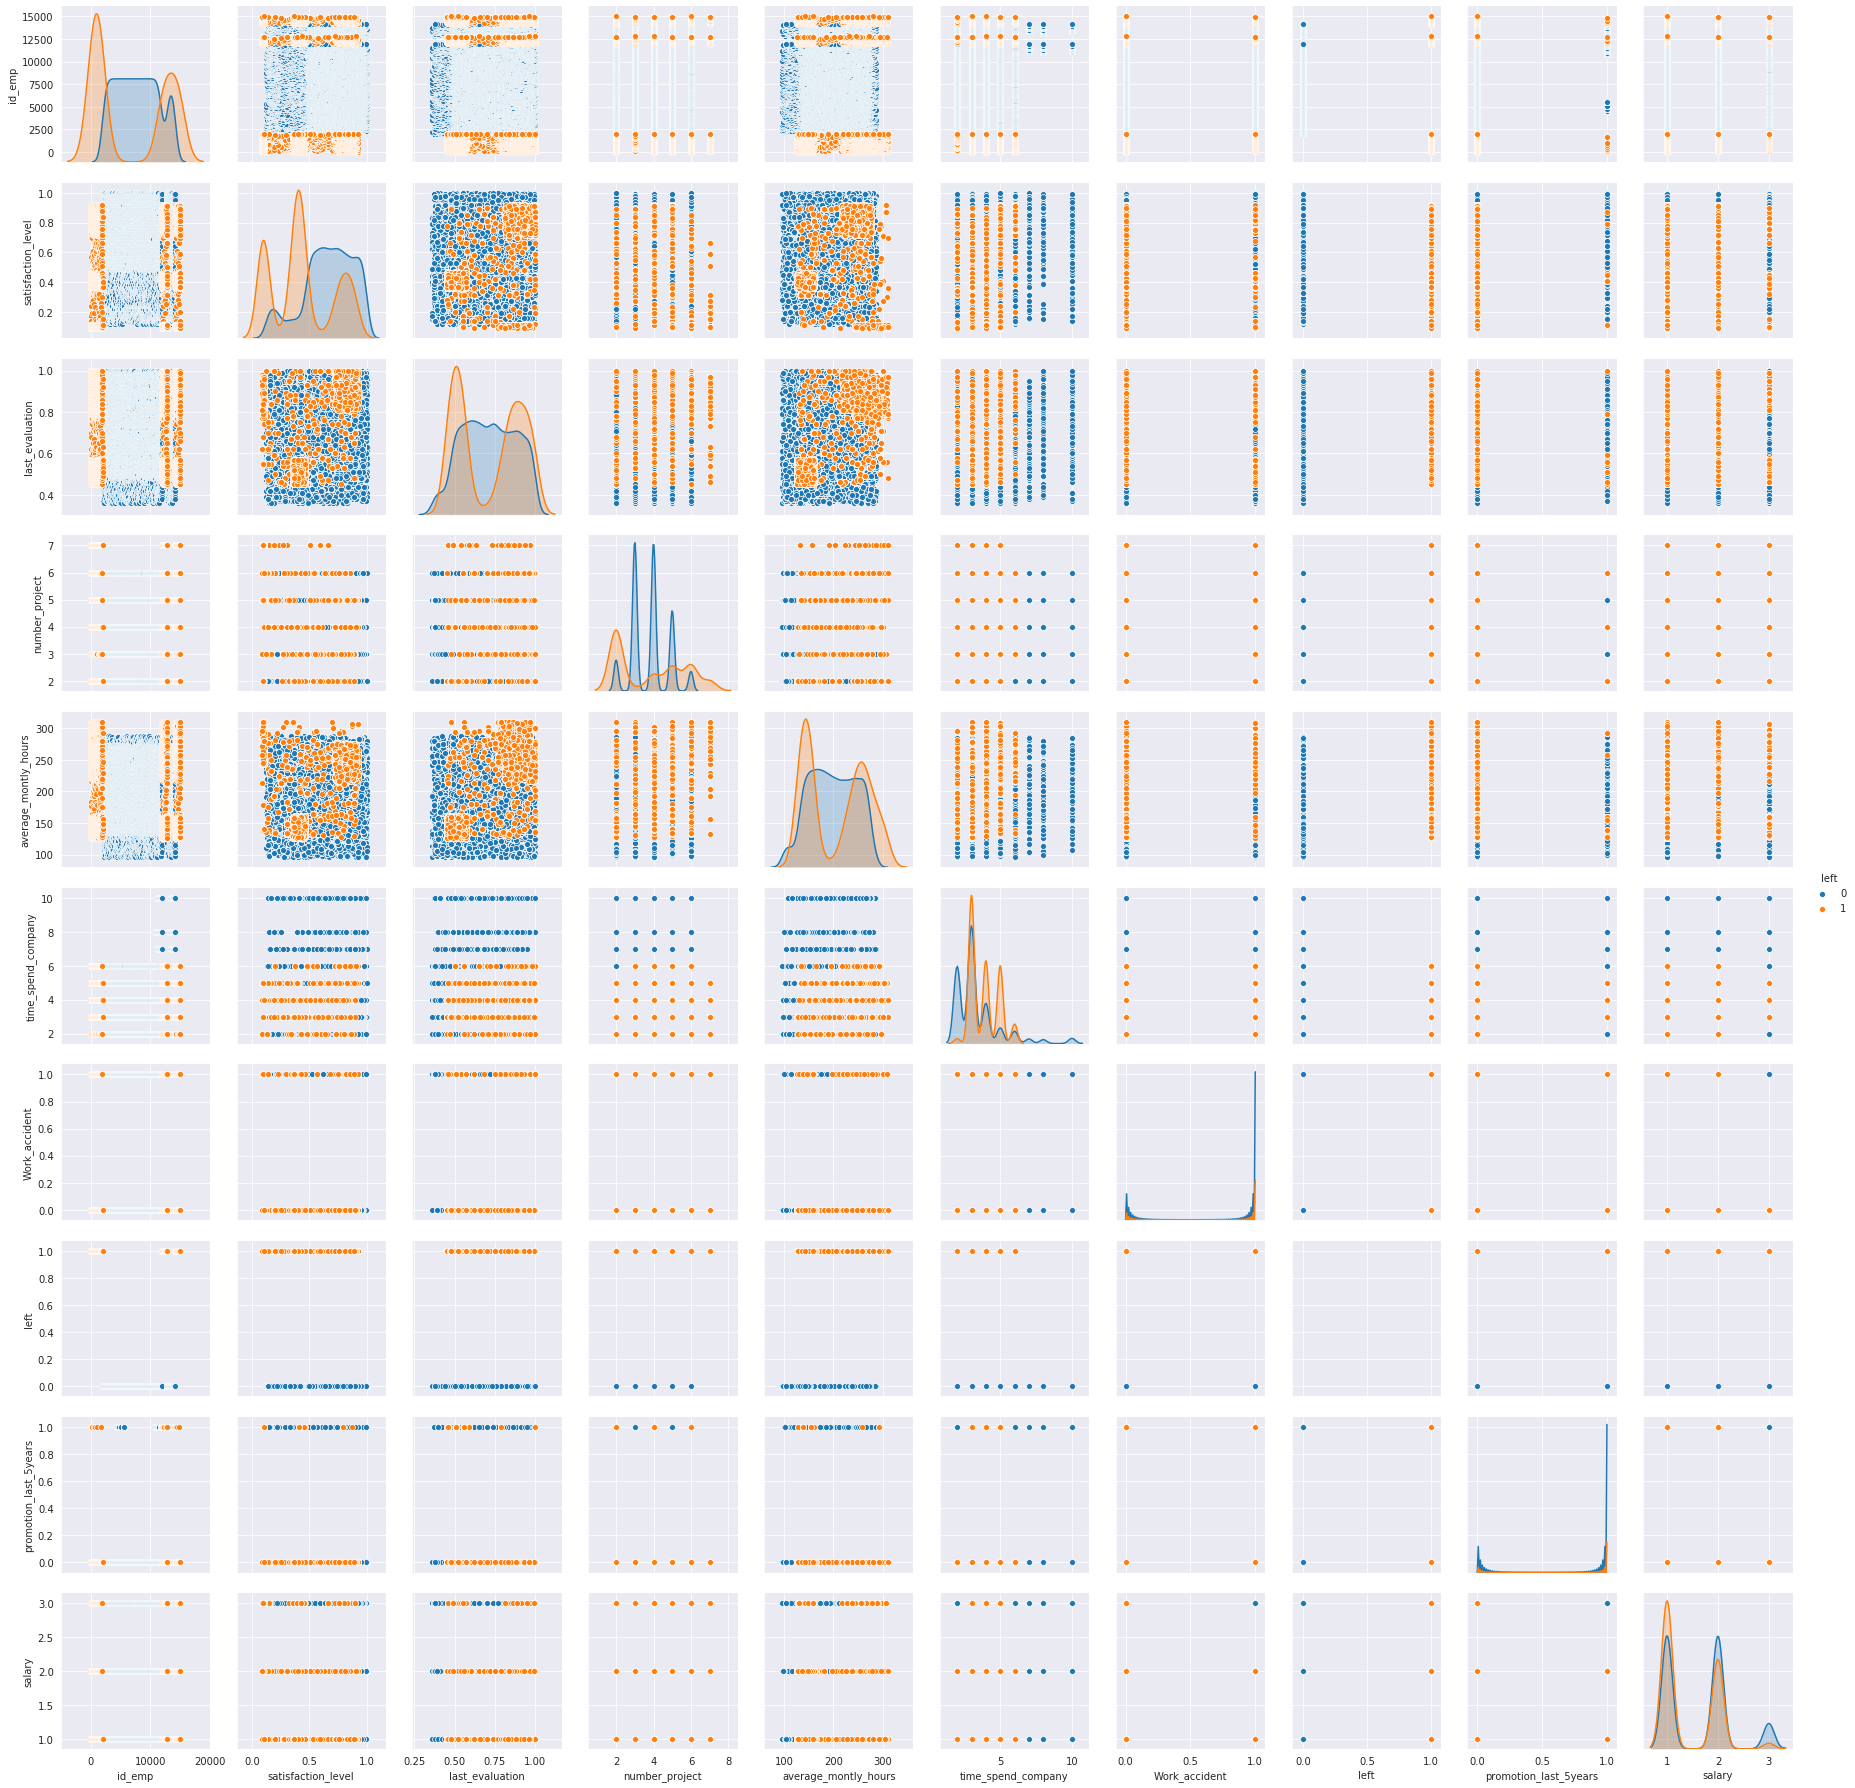

In [78]:
# Интересная взаимосвязь между повышениями, последней оценкой и времени проведённого на работе. Мы видим что в парном графике promotion_last_5years и last evaluation score
# уволившиеся сотрудники имели высокие оценки, но при этом не получали повышения. Так же мы видим, что на парном графике last avaluation score и average monthly hours, 
# наибольшее количество уволившихся сотрудников имеет высокие оценки и бОльшее количество времени проведенное на работе
fig = sns.pairplot(data=data, hue='left')
plt.show()

Исходя из проделанного анализа, интересно посмотреть похожи или отличаются выборки уволившихся сотрудников, которые получали повышение и которые не получали?

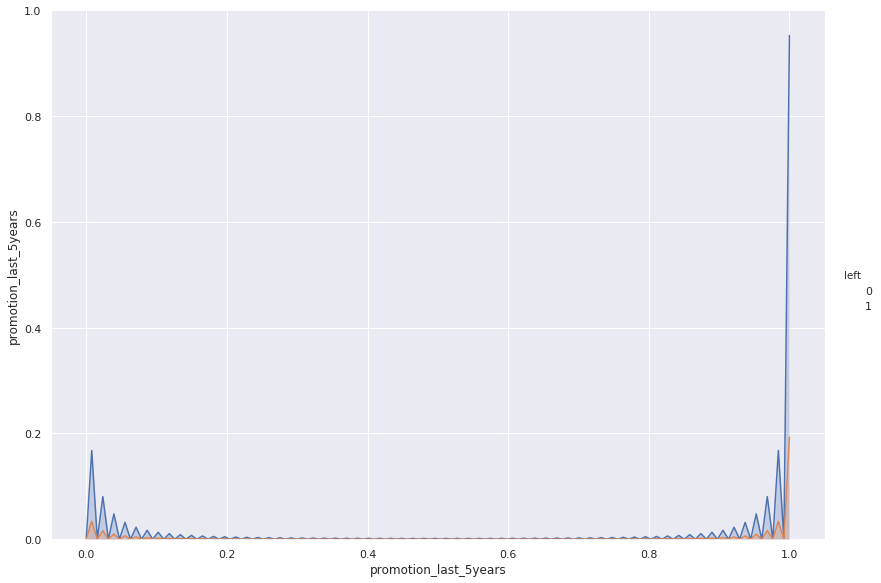

In [79]:
# На этом графике мы видим, что количество сотрудников получивших повышение и оставшихся в компании существенно больше, чем тех, кто ушёл. Возможно причина ухода людей из компании
# в том, что люди вкладывались в работу но не получали повышение.
sns.set(rc={'figure.figsize':(25,25)})
fig_1 = sns.pairplot(data=data, vars=["promotion_last_5years"], hue='left', height=8.27, aspect=11.7/8.27)

нормализуем данные, для этого нам нужно перевести названия отделов в цифры, а также сохранить отдельно названия столбцов, так как при нормализации они удаляются


In [0]:
headers = list(left.columns.values)

In [81]:
level_map_1 = {'sales':1, 'technical':2, 'support':3, 'IT':4, 'product_mng':5, 'marketing':6, 'RandD':7, 'accounting':8, 'hr':9, 'management':10 }
data['sales'] = data['sales'].map(level_map_1)
data.head()

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,1,1
1,1,0.80,0.86,5,262,6,0,1,0,1,2
2,2,0.11,0.88,7,272,4,0,1,0,1,2
3,3,0.72,0.87,5,223,5,0,1,0,1,1
4,4,0.37,0.52,2,159,3,0,1,0,1,1


In [0]:
left = data[data['left']==1]

In [83]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(left)
left_norm = pd.DataFrame(np_scaled)
left_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.000000,-0.301205,-0.709091,-1.0,-0.663043,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.999867,0.710843,0.490909,0.2,0.478261,1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,-0.999733,-0.951807,0.563636,1.0,0.586957,0.0,-1.0,-1.0,-1.0,-1.0,0.0
3,-0.999600,0.518072,0.527273,0.2,0.054348,0.5,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.999467,-0.325301,-0.745455,-1.0,-0.641304,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0


In [92]:
left_norm.columns = headers
left_norm.describe()

,id_emp,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000,3571.000000
mean,-0.133292,-0.156390,-0.025045,-0.257799,-0.115009,-0.061747,-0.905349,-1.0,-0.989359,-0.432092,-0.585270
std,0.835643,0.635984,0.718812,0.727266,0.665248,0.488849,0.424729,0.0,0.145517,0.597139,0.537341
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000
25%,-0.880984,-0.903614,-0.745455,-1.000000,-0.782609,-0.500000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000
50%,-0.761968,-0.228916,0.236364,-0.200000,0.065217,0.000000,-1.000000,-1.0,-1.000000,-0.555556,-1.000000
75%,0.690559,0.542169,0.636364,0.600000,0.478261,0.500000,-1.000000,-1.0,-1.000000,-0.111111,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000


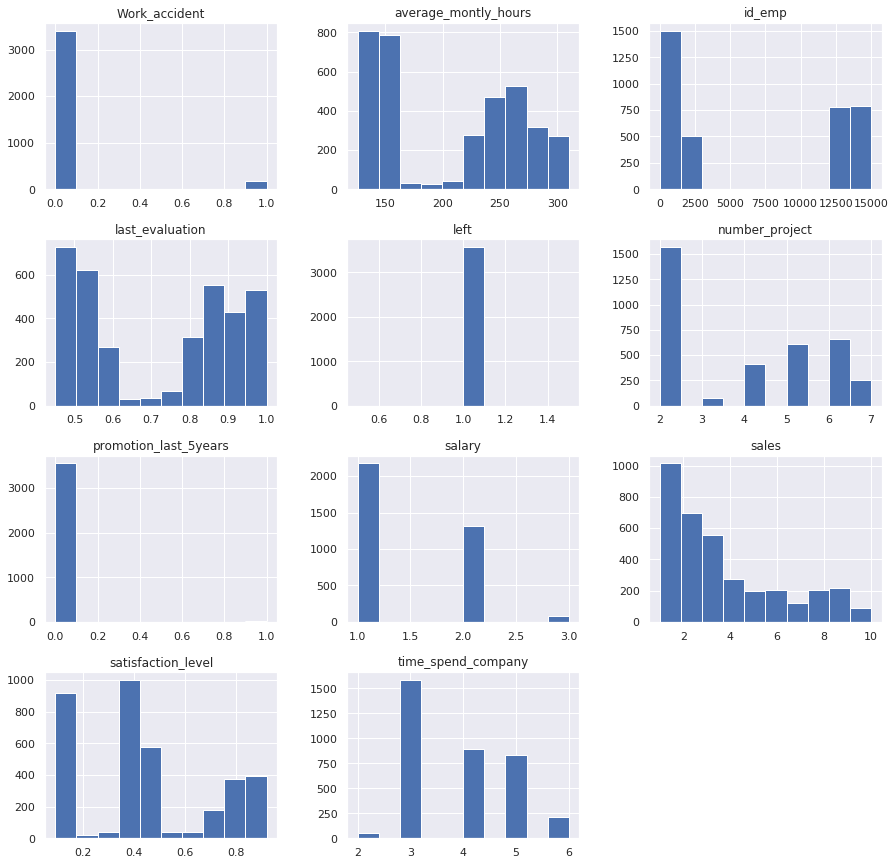

In [86]:
# на этих частотных графиках среди уволившихся людей мы видим, что в основном у них был еще и низкий уровень зарплаты
plt.rcParams['figure.figsize'] = [15, 15]
left.hist()
plt.show()